In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [2]:
rng=np.random.default_rng(seed=12345)

# choose a covariance matrix, vector v and true parameter a

just choosing a random but fixed value for v

In [3]:
ndim=5
v=rng.uniform(size=ndim)
atrue=42.

I just generate a random Correlation matrix here and some random σ to get a covariance by rescaling, this is not the best way to do so...

In [4]:
Corr=rng.uniform(low=-0.1,high=0.1,size=[ndim,ndim])
Corr+=Corr.T
np.fill_diagonal(Corr,1)
sigmas=rng.uniform(low=1e-3,high=10,size=ndim)
Cov=np.einsum('ij,i,j->ij',Corr,sigmas,sigmas)

plot the correlation matrix

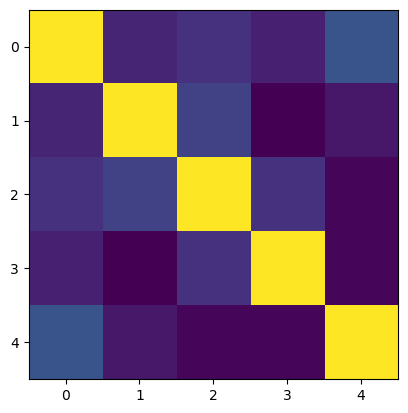

In [5]:
plt.figure()
plt.imshow(Corr)

plot the covariance matrix

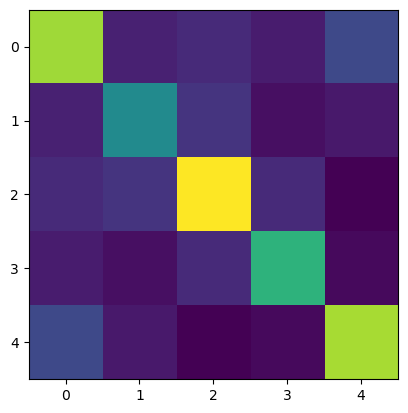

In [6]:
plt.figure()
plt.imshow(Cov)

# generate random numbers drawn from a multivariate Gaussian

generate data from true a given v and the covariance matrix

In [7]:
Xarr=rng.multivariate_normal(atrue*v,Cov,size=1000000)

visualize the drawn data compared to the true values

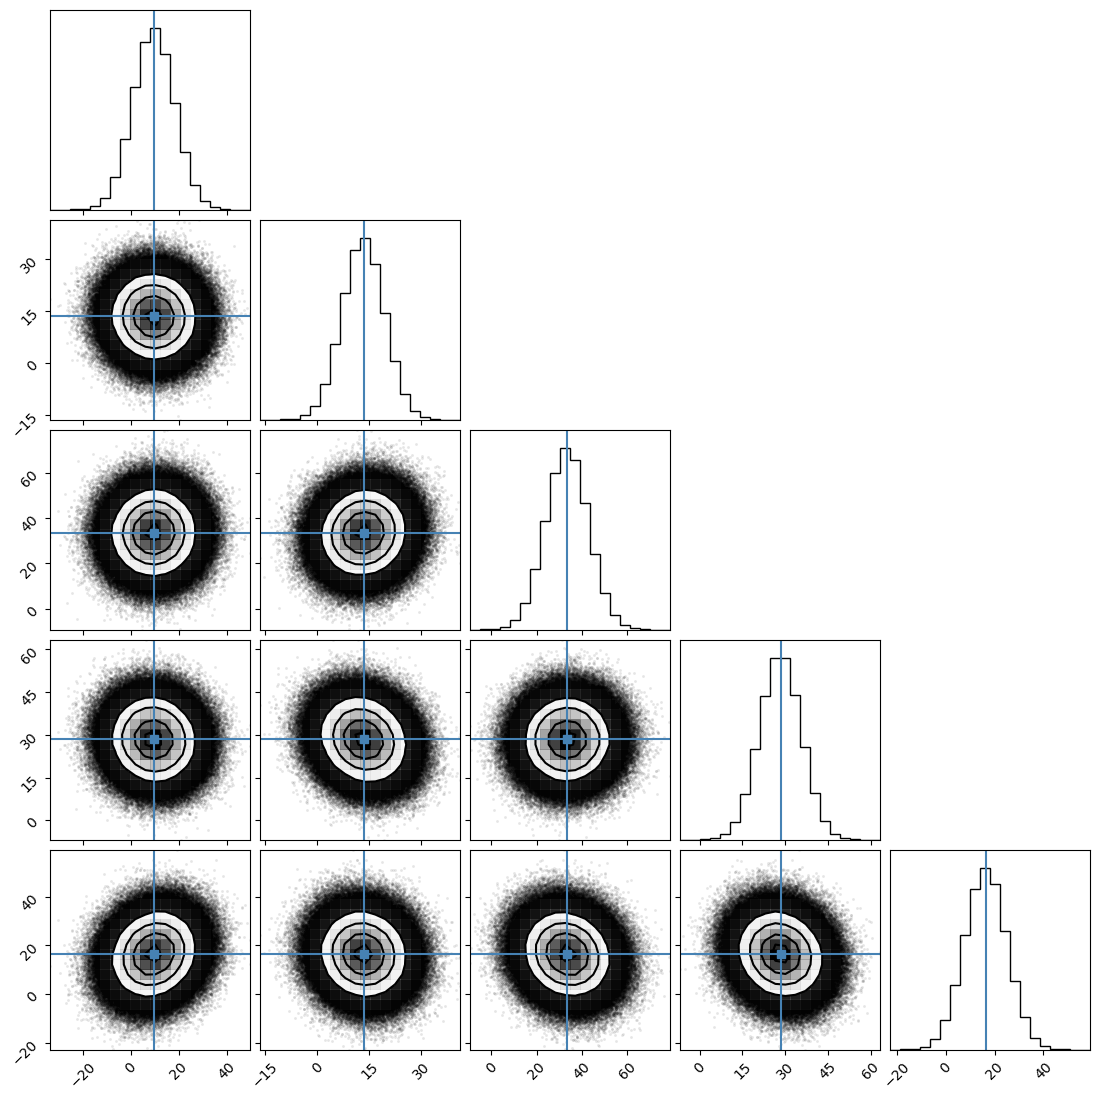

In [8]:
corner.corner(Xarr,truths=v*atrue);

# define 2 estimators for a, one is the optimal solution, the other one isn't

In [9]:
f_subopt=lambda X,v: np.dot(X,v)/np.dot(v,v)
f_best=lambda X,v,C: v@(np.linalg.inv(C)@X.T)/(v@np.linalg.inv(C)@v)

In [10]:
a_subopt=f_subopt(Xarr,v)
a_best=f_best(Xarr,v,Cov)

variance obtained using either estimator

In [11]:
print(np.var(a_subopt))

45.08522733176724


In [12]:
print(np.var(a_best))

39.201648633374276


compute $\chi^2$ by matrix multiplication explicitely

In [13]:
def chi2(X,a,v,C):
    return (X-a*v)@C@(X-a*v)

In [14]:
chi2arr=np.array([chi2(X,a,v,Cov) for X,a in zip(Xarr,a_best)])

In [15]:
chi2arr

array([12088.33012602,  6937.5373272 , 15566.26313899, ...,
       19765.94450091,  9055.18625174, 56124.9965123 ])

compute variance estimates from the fisher information

$F=(\frac{\partial \mu}{\partial a})^T C^{-1} (\frac{\partial\mu}{\partial a})\\\frac{\partial \mu}{\partial a} = v\\ \mathrm{Var}(a) \geq \frac{1}{F}$
the last inequality is the Cramer-Rao-bound

In [16]:
var_fisher=1/(v@np.linalg.inv(Cov)@v)

In [17]:
var_fisher

39.08220071114449

using the analytically derived variance for the sub-optimal estimator

In [18]:
var_subopt=v@Cov@v/(v@v)**2

In [19]:
var_subopt

44.97607792886374

plot histograms for both estimators, both give unbiased estimates of the true value, but with different accuracy

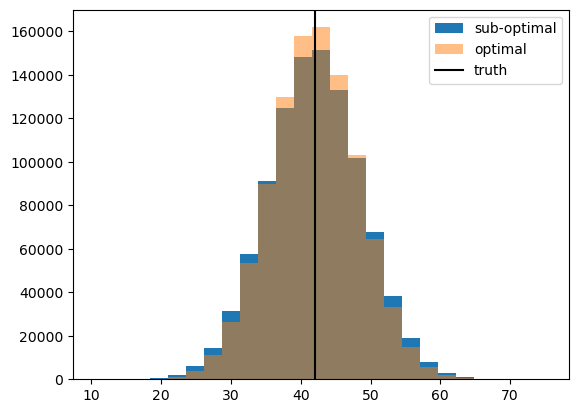

In [20]:
_,bins,_=plt.hist(a_subopt,bins=25,label='sub-optimal')
plt.hist(a_best,bins=bins,alpha=0.5,label='optimal')
plt.axvline(atrue,color='k',label='truth')
plt.legend()